In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os
import sys
sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.plotly as ply
import plotly.graph_objs as go
import plotly

plotly.offline.init_notebook_mode(connected=True)

from collections import Counter
from plotly import tools

DIABETES_DATA_PATH = os.path.join('../data/pima-diabetes')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Pima Diabetes dataset 

In [28]:
class_column = "Class"
data_columns = ["Number of times pregnant", 
                "Plasma glucose concentration a 2 hours in an oral glucose tolerance test",
                "Diastolic blood pressure (mm Hg)",
                "Triceps skin fold thickness (mm)",
                "2-Hour serum insulin (mu U/ml)",
                "Body mass index (weight in kg/(height in m)^2)",
                "Diabetes pedigree function",
                "Age (years)"]

output_cols = [
    "nb_pregnant", "glucose_concentration", "blood_pressure", "triceps_skinfold", "insulin", "bmi", "pedigree", "age", "class"
]

mapper = {k: v for k, v in zip(data_columns + [class_column], output_cols)}
print(mapper)

def load_diabetes_data():
    csv_data = pd.read_csv(os.path.join(DIABETES_DATA_PATH, 'pima-indians-diabetes.data'), 
                           names=data_columns + [class_column])
    print(csv_data)
    csv_data = csv_data.rename(index=str, columns=mapper)
#     print(np.unique(csv_data[class_column]))
    return csv_data
data = load_diabetes_data()
data

{'Number of times pregnant': 'nb_pregnant', 'Plasma glucose concentration a 2 hours in an oral glucose tolerance test': 'glucose_concentration', 'Diastolic blood pressure (mm Hg)': 'blood_pressure', 'Triceps skin fold thickness (mm)': 'triceps_skinfold', '2-Hour serum insulin (mu U/ml)': 'insulin', 'Body mass index (weight in kg/(height in m)^2)': 'bmi', 'Diabetes pedigree function': 'pedigree', 'Age (years)': 'age', 'Class': 'class'}
     Number of times pregnant  \
0                           6   
1                           1   
2                           8   
3                           1   
4                           0   
5                           5   
6                           3   
7                          10   
8                           2   
9                           8   
10                          4   
11                         10   
12                         10   
13                          1   
14                          5   
15                          7   


nb_pregnant  glucose_concentration  blood_pressure  triceps_skinfold  \
0              6                    148              72                35   
1              1                     85              66                29   
2              8                    183              64                 0   
3              1                     89              66                23   
4              0                    137              40                35   
5              5                    116              74                 0   
6              3                     78              50                32   
7             10                    115               0                 0   
8              2                    197              70                45   
9              8                    125              96                 0   
10             4                    110              92                 0   
11            10                    168              74                 0   
12            10                    139              80                 0   
13             1                    189              60                23   
14             5                    166              72                19   
15             7                    100               0                 0   
16             0                    118              84                47   
17             7                    107              74                 0   
18             1                    103              30                38   
19             1                    115              70                30   
20             3                    126              88                41   
21             8                     99              84                 0   
22             7                    196              90                 0   
23             9                    119              80                35   
24            11                    143              94                33   
25            10                    125              70                26   
26             7                    147              76                 0   
27             1                     97              66                15   
28            13                    145              82                19   
29             5                    117              92                 0   
..           ...                    ...             ...               ...   
738            2                     99              60                17   
739            1                    102              74                 0   
740           11                    120              80                37   
741            3                    102              44                20   
742            1                    109              58                18   
743            9                    140              94                 0   
744           13                    153              88                37   
745           12                    100              84                33   
746            1                    147              94                41   
747            1                     81              74                41   
748            3                    187              70                22   
749            6                    162              62                 0   
750            4                    136              70                 0   
751            1                    121              78                39   
752            3                    108              62                24   
753            0                    181              88                44   
754            8                    154              78                32   
755            1                    128              88                39   
756            7                    137              90                41   
757            0                    123              72                 0   
7

In [5]:
unique_classes = np.unique(data[class_column])
print(unique_classes)

[0 1]


In [6]:
description = data.describe()
description = description.append(data.nunique().rename('nunique'))
description


Number of times pregnant  \
count                  768.000000   
mean                     3.845052   
std                      3.369578   
min                      0.000000   
25%                      1.000000   
50%                      3.000000   
75%                      6.000000   
max                     17.000000   
nunique                 17.000000   

         Plasma glucose concentration a 2 hours in an oral glucose tolerance test  \
count                                           768.000000                          
mean                                            120.894531                          
std                                              31.972618                          
min                                               0.000000                          
25%                                              99.000000                          
50%                                             117.000000                          
75%                                             140.250000                          
max                                             199.000000                          
nunique                                         136.000000                          

         Diastolic blood pressure (mm Hg)  Triceps skin fold thickness (mm)  \
count                          768.000000                        768.000000   
mean                            69.105469                         20.536458   
std                             19.355807                         15.952218   
min                              0.000000                          0.000000   
25%                             62.000000                          0.000000   
50%                             72.000000                         23.000000   
75%                             80.000000                         32.000000   
max                            122.000000                         99.000000   
nunique                         47.000000                         51.000000   

         2-Hour serum insulin (mu U/ml)  \
count                        768.000000   
mean                          79.799479   
std                          115.244002   
min                            0.000000   
25%                            0.000000   
50%                           30.500000   
75%                          127.250000   
max                          846.000000   
nunique                      186.000000   

         Body mass index (weight in kg/(height in m)^2)  \
count                                        768.000000   
mean                                          31.992578   
std                                            7.884160   
min                                            0.000000   
25%                                           27.300000   
50%                                           32.000000   
75%                                           36.600000   
max                                           67.100000   
nunique                                      248.000000   

         Diabetes pedigree function  Age (years)       Class  
count                    768.000000   768.000000  768.000000  
mean                       0.471876    33.240885    0.348958  
std                        0.331329    11.760232    0.476951  
min                        0.078000    21.000000    0.000000  
25%                        0.243750    24.000000    0.000000  
50%                        0.372500    29.000000    0.000000  
75%                        0.626250    41.000000    1.000000  
max                        2.420000    81.000000    1.000000  
nunique                  517.000000    52.000000    2.000000

In [7]:
data[class_column].value_counts()

0    500
1    268
Name: Class, dtype: int64

In [8]:
rows_with_zeros = [
    data[data["Triceps skin fold thickness (mm)"] == 0],
    data[data["Plasma glucose concentration a 2 hours in an oral glucose tolerance test"] == 0],
    data[data["Diastolic blood pressure (mm Hg)"] == 0],
    data[data["Body mass index (weight in kg/(height in m)^2)"] == 0],
    data[data["Diabetes pedigree function"] == 0],
    data[data["2-Hour serum insulin (mu U/ml)"] == 0]
]
rows_with_zeros = pd.concat(rows_with_zeros)
rows_with_zeros = rows_with_zeros.drop_duplicates()
rows_with_zeros.describe()
# data = data.drop(rows_with_zeros.index)
# data.describe()

Number of times pregnant  \
count                376.000000   
mean                   4.412234   
std                    3.440583   
min                    0.000000   
25%                    1.000000   
50%                    4.000000   
75%                    7.000000   
max                   14.000000   

       Plasma glucose concentration a 2 hours in an oral glucose tolerance test  \
count                                         376.000000                          
mean                                          119.087766                          
std                                            33.036388                          
min                                             0.000000                          
25%                                            99.000000                          
50%                                           115.000000                          
75%                                           138.000000                          
max                                           199.000000                          

       Diastolic blood pressure (mm Hg)  Triceps skin fold thickness (mm)  \
count                        376.000000                        376.000000   
mean                          67.481383                         11.561170   
std                           24.459810                         15.713823   
min                            0.000000                          0.000000   
25%                           64.000000                          0.000000   
50%                           72.000000                          0.000000   
75%                           80.000000                         26.250000   
max                          122.000000                         99.000000   

       2-Hour serum insulin (mu U/ml)  \
count                      376.000000   
mean                         0.297872   
std                          4.737549   
min                          0.000000   
25%                          0.000000   
50%                          0.000000   
75%                          0.000000   
max                         89.000000   

       Body mass index (weight in kg/(height in m)^2)  \
count                                      376.000000   
mean                                        30.852394   
std                                          8.549205   
min                                          0.000000   
25%                                         26.475000   
50%                                         31.200000   
75%                                         35.625000   
max                                         52.900000   

       Diabetes pedigree function  Age (years)       Class  
count                  376.000000   376.000000  376.000000  
mean                     0.418529    35.718085    0.367021  
std                      0.307390    12.740708    0.482635  
min                      0.078000    21.000000    0.000000  
25%                      0.209000    25.000000    0.000000  
50%                      0.302500    32.000000    0.000000  
75%                      0.554750    43.000000    1.000000  
max                      1.893000    72.000000    1.000000

In [9]:
data.dtypes

Number of times pregnant                                                      int64
Plasma glucose concentration a 2 hours in an oral glucose tolerance test      int64
Diastolic blood pressure (mm Hg)                                              int64
Triceps skin fold thickness (mm)                                              int64
2-Hour serum insulin (mu U/ml)                                                int64
Body mass index (weight in kg/(height in m)^2)                              float64
Diabetes pedigree function                                                  float64
Age (years)                                                                   int64
Class                                                                         int64
dtype: object

In [10]:
stats = {}
for cls in np.unique(data[class_column]):
    sub_data = data[data[class_column]==cls]
    stats[class_column] = sub_data
    trace = go.Table(
        header=dict(values=sub_data.columns,
                   fill=dict(color="#999999"),
                   align=['center'] * len(sub_data.columns)),
        cells=dict(values=[sub_data[col] for col in data_columns] + [sub_data[class_column]],
                  fill=dict(color="#dddddd"),
                  align=['left'] * len(sub_data.columns)),
    )
    plotly.offline.iplot([trace], filename='wot')
    print(sub_data.describe())

       Number of times pregnant  \
count                500.000000   
mean                   3.298000   
std                    3.017185   
min                    0.000000   
25%                    1.000000   
50%                    2.000000   
75%                    5.000000   
max                   13.000000   

       Plasma glucose concentration a 2 hours in an oral glucose tolerance test  \
count                                           500.0000                          
mean                                            109.9800                          
std                                              26.1412                          
min                                               0.0000                          
25%                                              93.0000                          
50%                                             107.0000                          
75%                                             125.0000                          
max                 

       Number of times pregnant  \
count                268.000000   
mean                   4.865672   
std                    3.741239   
min                    0.000000   
25%                    1.750000   
50%                    4.000000   
75%                    8.000000   
max                   17.000000   

       Plasma glucose concentration a 2 hours in an oral glucose tolerance test  \
count                                         268.000000                          
mean                                          141.257463                          
std                                            31.939622                          
min                                             0.000000                          
25%                                           119.000000                          
50%                                           140.000000                          
75%                                           167.000000                          
max                 

In [11]:
def generate_possible_data_combinations():
    combinations = []
    titles = []
    for i in range(0, len(data_columns) - 1):
        for j in range(i + 1, len(data_columns)):
            combinations.append((data_columns[i], data_columns[j]))
            titles.append(f'{data_columns[i].capitalize()} to {data_columns[j].capitalize()}')
    return combinations, titles

def get_traces(attribute_1, attribute_2):
    classes = np.unique(data[class_column])
    traces = []
    for cls in classes:
        trace = go.Scatter(
            x=data[data[class_column] == cls][attribute_1],
            y=data[data[class_column] == cls][attribute_2],
            mode='markers',
            marker=dict(
                size="10",
                line = dict(
                    width = 2,
                )
            ),
            name=cls
        )
        traces.append(trace)
    return traces

def plot(title):
    combinations, titles = generate_possible_data_combinations()
    rows, cols = len(combinations) // 2 + 1, 2
    fig = tools.make_subplots(rows=rows, cols=cols, subplot_titles=titles)
    
    i = 0
    for y in range(1, rows + 1):
        for x in range(1, cols + 1):
            if i >= len(combinations):
                break
            first, second = combinations[i]
            
            layout = dict(
                title=titles[i],
                yaxis=dict(zeroline=False, title=first),
                xaxis=dict(zeroline=False, title=second)
            )
            i += 1

            sub_fig = dict(data=list(get_traces(first, second)), layout=layout)
            sub_fig = plotly.offline.iplot(sub_fig, filename='jupyter/kek')


In [12]:
plot("Attribute correlation")

This is the format of your plot grid:
[ (1,1) x1,y1 ]     [ (1,2) x2,y2 ]   
[ (2,1) x3,y3 ]     [ (2,2) x4,y4 ]   
[ (3,1) x5,y5 ]     [ (3,2) x6,y6 ]   
[ (4,1) x7,y7 ]     [ (4,2) x8,y8 ]   
[ (5,1) x9,y9 ]     [ (5,2) x10,y10 ] 
[ (6,1) x11,y11 ]   [ (6,2) x12,y12 ] 
[ (7,1) x13,y13 ]   [ (7,2) x14,y14 ] 
[ (8,1) x15,y15 ]   [ (8,2) x16,y16 ] 
[ (9,1) x17,y17 ]   [ (9,2) x18,y18 ] 
[ (10,1) x19,y19 ]  [ (10,2) x20,y20 ]
[ (11,1) x21,y21 ]  [ (11,2) x22,y22 ]
[ (12,1) x23,y23 ]  [ (12,2) x24,y24 ]
[ (13,1) x25,y25 ]  [ (13,2) x26,y26 ]
[ (14,1) x27,y27 ]  [ (14,2) x28,y28 ]
[ (15,1) x29,y29 ]  [ (15,2) x30,y30 ]



In [13]:
data.corr()

Number of times pregnant  \
Number of times pregnant                                            1.000000   
Plasma glucose concentration a 2 hours in an or...                  0.129459   
Diastolic blood pressure (mm Hg)                                    0.141282   
Triceps skin fold thickness (mm)                                   -0.081672   
2-Hour serum insulin (mu U/ml)                                     -0.073535   
Body mass index (weight in kg/(height in m)^2)                      0.017683   
Diabetes pedigree function                                         -0.033523   
Age (years)                                                         0.544341   
Class                                                               0.221898   

                                                    Plasma glucose concentration a 2 hours in an oral glucose tolerance test  \
Number of times pregnant                                                                     0.129459                          
Plasma glucose concentration a 2 hours in an or...                                           1.000000                          
Diastolic blood pressure (mm Hg)                                                             0.152590                          
Triceps skin fold thickness (mm)                                                             0.057328                          
2-Hour serum insulin (mu U/ml)                                                               0.331357                          
Body mass index (weight in kg/(height in m)^2)                                               0.221071                          
Diabetes pedigree function                                                                   0.137337                          
Age (years)                                                                                  0.263514                          
Class                                                                                        0.466581                          

                                                    Diastolic blood pressure (mm Hg)  \
Number of times pregnant                                                    0.141282   
Plasma glucose concentration a 2 hours in an or...                          0.152590   
Diastolic blood pressure (mm Hg)                                            1.000000   
Triceps skin fold thickness (mm)                                            0.207371   
2-Hour serum insulin (mu U/ml)                                              0.088933   
Body mass index (weight in kg/(height in m)^2)                              0.281805   
Diabetes pedigree function                                                  0.041265   
Age (years)                                                                 0.239528   
Class                                                                       0.065068   

                                                    Triceps skin fold thickness (mm)  \
Number of times pregnant                                                   -0.081672   
Plasma glucose concentration a 2 hours in an or...                          0.057328   
Diastolic blood pressure (mm Hg)                                            0.207371   
Triceps skin fold thickness (mm)                                            1.000000   
2-Hour serum insulin (mu U/ml)                                              0.436783   
Body mass index (weight in kg/(height in m)^2)                              0.392573   
Diabetes pedigree function                                                  0.183928   
Age (years)                                                                -0.113970   
Class                                                                       0.074752   

                                                    2-Hour serum insulin (mu U/ml)  \
Number of times pregnant                                                 -0.073535   
Plasma glucose concentration a 2 hou

In [14]:
int_data = data
a_map = {}
for i, cls in enumerate(np.unique(data[class_column])):
    a_map[cls] = i

data[class_column] = data[class_column].map(a_map)

for column in data_columns:
    print(f"{column.capitalize()} to {class_column.capitalize()}: {int_data[column].corr(int_data[class_column])}")

Number of times pregnant to Class: 0.22189815303398613
Plasma glucose concentration a 2 hours in an oral glucose tolerance test to Class: 0.46658139830687295
Diastolic blood pressure (mm hg) to Class: 0.0650683595503327
Triceps skin fold thickness (mm) to Class: 0.0747522319183194
2-hour serum insulin (mu u/ml) to Class: 0.13054795488404794
Body mass index (weight in kg/(height in m)^2) to Class: 0.29269466264444494
Diabetes pedigree function to Class: 0.17384406565295957
Age (years) to Class: 0.23835598302719754


In [15]:
def plot_space():
    for column in data_columns:
        d = np.unique(data[column])
        trace = go.Scatter(
            x = d,
            y = [0] * len(d),
            mode='markers',
            marker=dict(
                size="10",
                line = dict(
                    width = 2,
                )
            ),
            name=column
        )

        layout = dict(
            title=column,
            xaxis=dict(zeroline=False)
        )

        fig = dict(data=[trace], layout=layout)
        plotly.offline.iplot(fig, filename='jupyter/data/' + column)
    

In [16]:
plot_space()

In [ ]:
from sklearn import manifold

def matplotlib_to_plotly(cmap, pl_entries):
    h = 1.0/(pl_entries-1)
    pl_colorscale = []
    
    for k in range(pl_entries):
        C = list(map(np.uint8, np.array(cmap(k*h)[:3])*255))
        pl_colorscale.append([k*h, 'rgb'+str((C[0], C[1], C[2]))])
        
    return pl_colorscale

plot_data = []
cmap = matplotlib_to_plotly(plt.cm.rainbow, len(np.unique(data[class_column])))
colors = []
for i, class_name in enumerate(np.unique(data[class_column])):
    colors += [cmap[i]] * len(data[data[class_column] == class_name])


tsne = manifold.TSNE(n_components=3, init='pca')
trans_data = tsne.fit_transform(data)
for i, cls in enumerate(np.unique(data[class_column])):
    indices = data.index[data[class_column] == cls]
    trace = go.Scatter3d(x=trans_data[indices][:, 0], 
                         y=trans_data[indices][:, 1], 
                         z=trans_data[indices][:, 2], 
                       mode='markers', 
                       marker=dict(color=None, 
                                   colorscale=cmap,
                                   showscale=False,
                                   line=dict(color='black', width=1)),
                        name=f'Class {i}')
    plot_data.append(trace)

            
layout = dict(
    title="TSNE Visualization",
)

fig = dict(data=plot_data, layout=layout)
plotly.offline.iplot(fig, filename='jupyter/tscne')


O.o

o.O

o.o

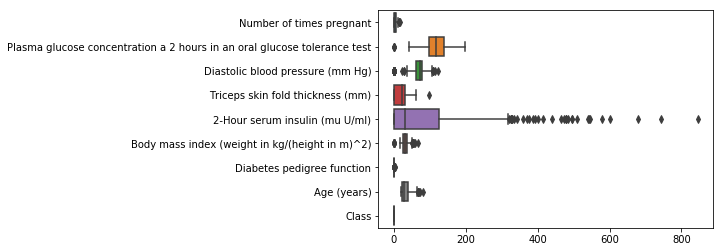

In [20]:
ax = sns.boxplot(data=data, orient='h')

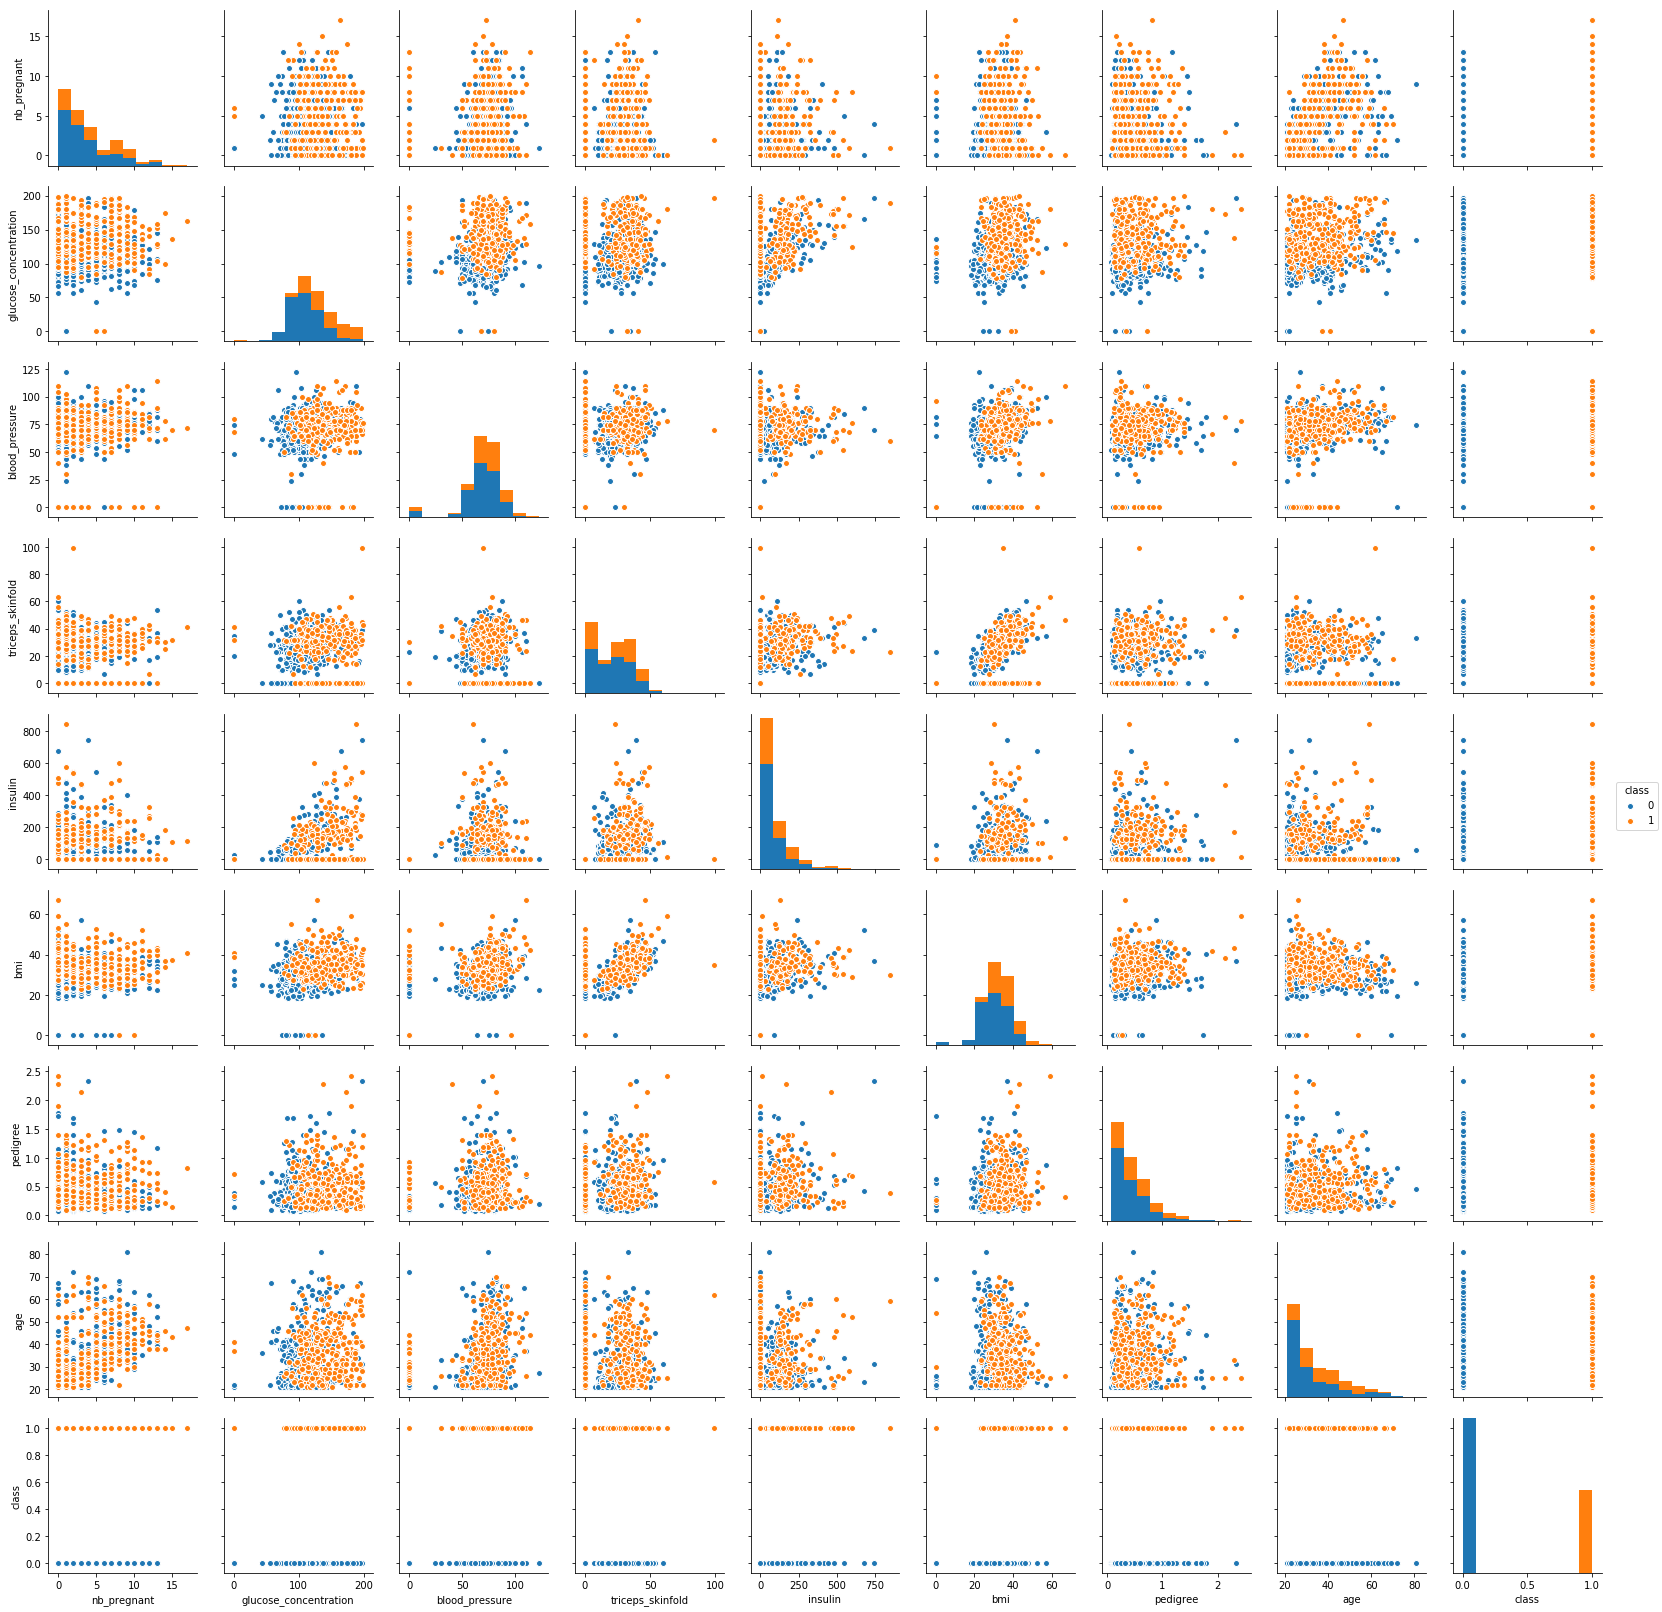

In [30]:
g = sns.pairplot(data, hue="class")